In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, Reshape
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load CIFAR-10 dataset
(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Convert TF Dataset to numpy arrays for easier manipulation
def dataset_to_numpy(ds):
    images, labels = [], []
    for img, lbl in tfds.as_numpy(ds):
        images.append(img)
        labels.append(lbl)
    return np.array(images), np.array(labels)

X_train, y_train = dataset_to_numpy(ds_train)
X_test, y_test = dataset_to_numpy(ds_test)

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.OXNBQB_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.OXNBQB_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


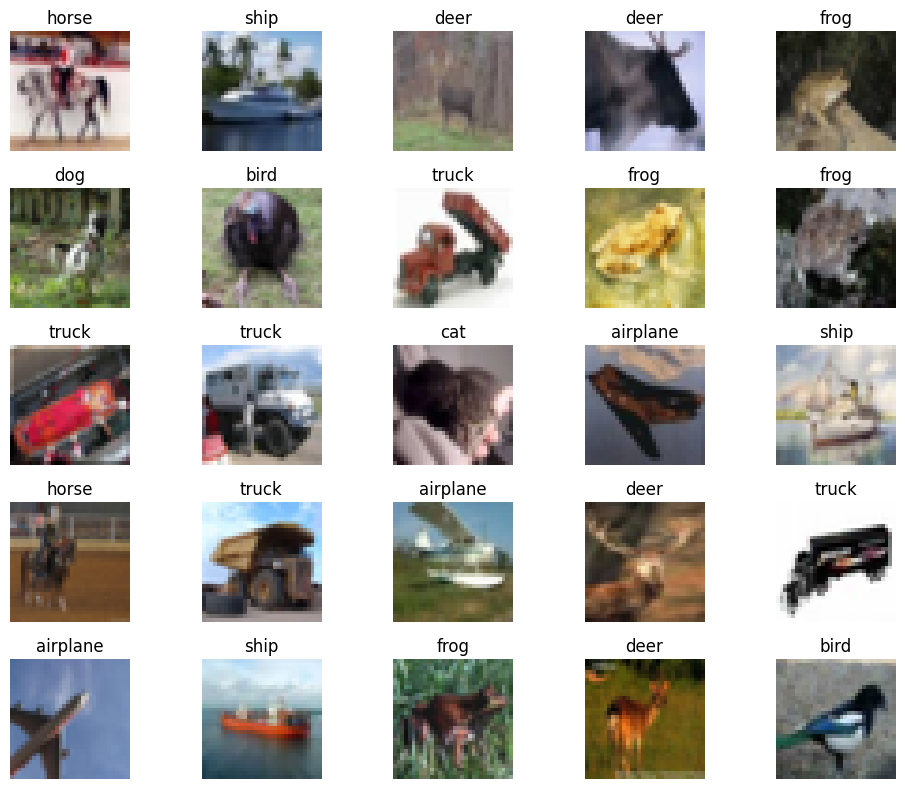

In [2]:
# Visualize sample images
plt.figure(figsize=(10, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()


=== Training CNN (Fast Mode) ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
176/176 ━━━━━━━━━━━━━━━━━━━━ 51s 279ms/step - accuracy: 0.2805 - loss: 1.9715 - val_accuracy: 0.4566 - val_loss: 1.5192
Epoch 2/3
176/176 ━━━━━━━━━━━━━━━━━━━━ 82s 278ms/step - accuracy: 0.4825 - loss: 1.4527 - val_accuracy: 0.5276 - val_loss: 1.3323
Epoch 3/3
176/176 ━━━━━━━━━━━━━━━━━━━━ 83s 283ms/step - accuracy: 0.5439 - loss: 1.3002 - val_accuracy: 0.5660 - val_loss: 1.2265

=== Training LSTM (Fast Mode) ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
176/176 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.2207 - loss: 2.1094 - val_accuracy: 0.3510 - val_loss: 1.7740
Epoch 2/3
176/176 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.3650 - loss: 1.7408 - val_accuracy: 0.4046 - val_loss: 1.6461
Epoch 3/3
176/176 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.4002 - loss: 1.6554 - val_accuracy: 0.4314 - val_loss: 1.5758

=== Quick Evaluation ===
CNN Test Accuracy: 0.5628 (after 3 epochs)
LSTM Test Accuracy: 0.4290 (after 3 epochs)

CNN Sample Prediction:


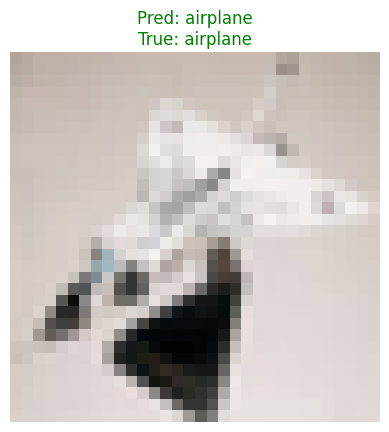


LSTM Sample Prediction:


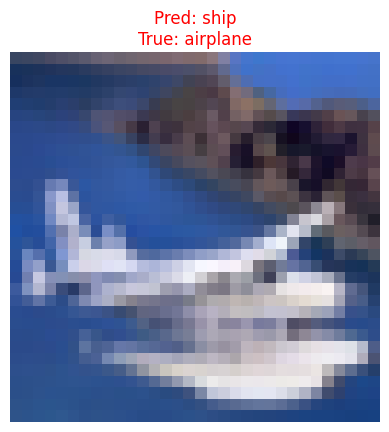


Total execution time: 292.88 seconds


In [7]:
# Cell 6: Fast Training Version (Complete)
import time
start_time = time.time()

# Fast training configuration
FAST_EPOCHS = 3  # Reduced from 5 to 3 for even faster completion
FAST_BATCH_SIZE = 256  # Increased batch size for faster processing
VALIDATION_SPLIT = 0.1  # Reduced validation size

# --- CNN Model ---
print("\n=== Training CNN (Fast Mode) ===")
cnn_model_fast = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model_fast.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_cnn_fast = cnn_model_fast.fit(
    X_train, y_train,
    epochs=FAST_EPOCHS,
    batch_size=FAST_BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    verbose=1
)

# --- LSTM Model ---
print("\n=== Training LSTM (Fast Mode) ===")
X_train_lstm = X_train.reshape(-1, 32, 32*3)  # Reshape for LSTM
X_test_lstm = X_test.reshape(-1, 32, 32*3)

lstm_model_fast = Sequential([
    LSTM(64, input_shape=(32, 96)),  # Reduced units for faster training
    Dense(10, activation='softmax')
])

lstm_model_fast.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

history_lstm_fast = lstm_model_fast.fit(
    X_train_lstm, y_train,
    epochs=FAST_EPOCHS,
    batch_size=FAST_BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    verbose=1
)

# --- Quick Evaluation ---
print("\n=== Quick Evaluation ===")
cnn_test_loss, cnn_test_acc = cnn_model_fast.evaluate(X_test, y_test, verbose=0)
lstm_test_loss, lstm_test_acc = lstm_model_fast.evaluate(X_test_lstm, y_test, verbose=0)

print(f"CNN Test Accuracy: {cnn_test_acc:.4f} (after {FAST_EPOCHS} epochs)")
print(f"LSTM Test Accuracy: {lstm_test_acc:.4f} (after {FAST_EPOCHS} epochs)")

# --- Quick Predictions ---
def show_quick_prediction(model, X, model_type):
    idx = np.random.randint(0, len(X_test))
    plt.imshow(X_test[idx])
    if model_type == 'LSTM':
        pred = model.predict(X_test_lstm[idx][np.newaxis, ...], verbose=0)
    else:
        pred = model.predict(X_test[idx][np.newaxis, ...], verbose=0)
    pred_label = np.argmax(pred)
    true_label = np.argmax(y_test[idx])
    plt.title(f"Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}",
              color='green' if pred_label == true_label else 'red')
    plt.axis('off')
    plt.show()

print("\nCNN Sample Prediction:")
show_quick_prediction(cnn_model_fast, X_test, 'CNN')

print("\nLSTM Sample Prediction:")
show_quick_prediction(lstm_model_fast, X_test_lstm, 'LSTM')

print(f"\nTotal execution time: {time.time()-start_time:.2f} seconds")